In [ ]:

# librerias
# from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow_datasets as tfds


In [6]:
# Cargar el dataset IMDB
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# Dividir en datos de entrenamiento y prueba
train_data, test_data = imdb['train'], imdb['test']


c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 100%|██████████| 1/1 [00:30<00:00, 30.25s/ url]


Dataset imdb_reviews downloaded and prepared to C:\Users\USUARIO\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [8]:
# Convertir a listas o arrays para usar con train_test_split
train_reviews, train_labels = [], []
for review, label in train_data:
    train_reviews.append(review.numpy().decode('utf-8'))  # Convertir de tensor a string
    train_labels.append(label.numpy())

# Hacer lo mismo para el conjunto de prueba
test_reviews, test_labels = [], []
for review, label in test_data:
    test_reviews.append(review.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

# Ahora puedes usar train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_reviews, train_labels, test_size=0.3, random_state=42)

# Verifica las formas de tus datos
print(f'X_train: {len(X_train)}, X_test: {len(X_test)}, y_train: {len(y_train)}, y_test: {len(y_test)}')


X_train: 17500, X_test: 7500, y_train: 17500, y_test: 7500


In [9]:
# preproesamiento y vectorizacion

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización de texto
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
# entrenamiento del modelo
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear y entrenar el modelo SVM
model = SVC(kernel='linear')
model.fit(X_train_vec, y_train)

# Predicciones
y_pred = model.predict(X_test_vec)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


Accuracy: 0.8822666666666666
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3863
           1       0.87      0.89      0.88      3637

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



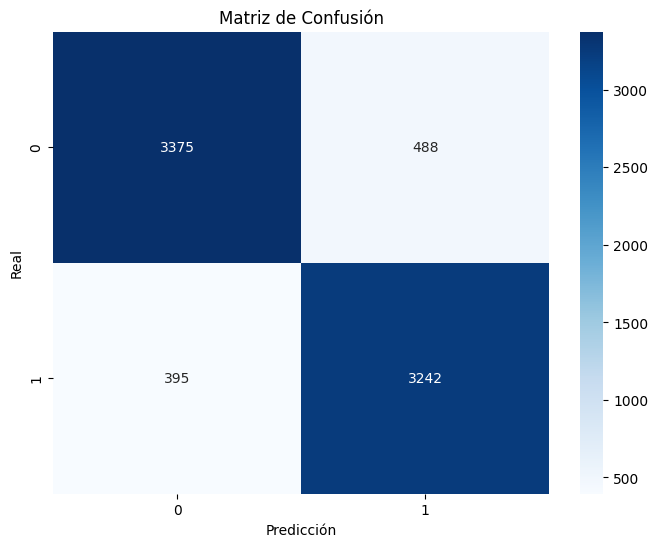

In [11]:
# visualziacion de graficos y metricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [12]:
import pickle

# Guardar el modelo entrenado y el vectorizador
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Modelo y vectorizador guardados exitosamente.")

Modelo y vectorizador guardados exitosamente.
